In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import  warnings
warnings.filterwarnings("ignore")

In [3]:
train_path ="./train.csv"
test_path = "./test.csv"
train_data = pd.read_csv(train_path )
train_data.head(5)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [4]:
train_data.drop('hour'  ,axis  =1 ,  inplace= True )

In [5]:
from sklearn.preprocessing import  LabelEncoder 

##### label Encoder 

In [6]:
strings_features  = list(train_data.columns[train_data.dtypes =="object"])
for  feature in strings_features :
    encoder = LabelEncoder()
    train_data[feature] = encoder.fit_transform(train_data[feature] )

树模型不必z-score

# xgboost predict feature importance 

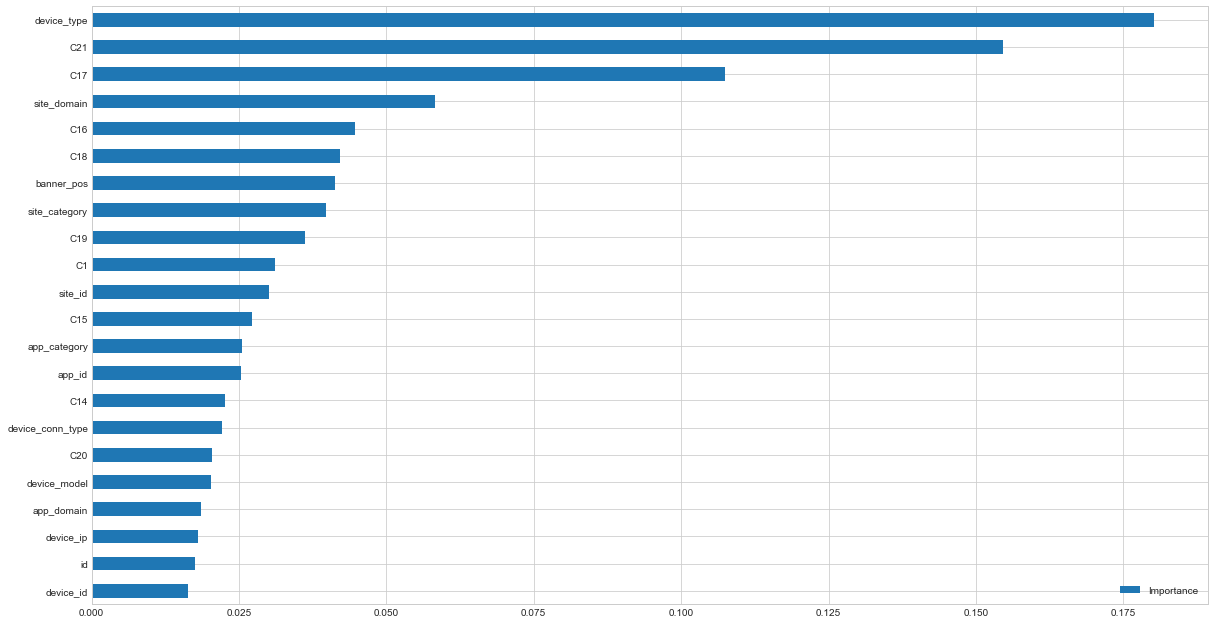

In [8]:

from xgboost import XGBClassifier
import xgboost as xgb 
from sklearn.metrics import confusion_matrix 

y, X = train_data.pop('click') ,train_data
xgb_model = XGBClassifier().fit(X, y)


plt.style.use('seaborn-whitegrid')
importance = xgb_model.feature_importances_
importance = pd.DataFrame(importance, index=X.columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2))
plt.show()